# Communicate Data Finding: Ford GoBike System Data
## By:- Shreyas Shukla

#### INVESTIGATION OVERVIEW
This project analyses Ford GoBike dataset for Year 2019 (till July). GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across the greater San Francisco Bay area. More information on this program is available here: https://www.fordgobike.com

##### DATASET OVERVIEW
Data has been downloaded from https://www.lyft.com/bikes/bay-wheels/system-data and our analysis revolves around following features:-
1. Member Age
2. Member Gender
3. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
4. Trip Duration(in minutes)
5. Start Time and Date
6. End Time and Date
7. Start Station ID
8. End Station ID
9. Start Station Name
10. End Station Name


In [1]:
#from IPython.display import HTML

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
 #if (code_show){
 #$('div.input').hide();
 #} else {
 #$('div.input').show();
 #}
 #code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [3]:
ford_raw0719 = pd.read_csv('E:/data/UDACITY/Project5/201907-baywheels-tripdata.csv', low_memory= False)
ford_raw0619 = pd.read_csv('E:/data/UDACITY/Project5/201906-baywheels-tripdata.csv', low_memory= False)
ford_raw0519 = pd.read_csv('E:/data/UDACITY/Project5/201905-baywheels-tripdata.csv', low_memory= False)
ford_raw0419 = pd.read_csv('E:/data/UDACITY/Project5/201904-fordgobike-tripdata.csv', low_memory= False)
ford_raw0319 = pd.read_csv('E:/data/UDACITY/Project5/201903-fordgobike-tripdata.csv', low_memory= False)
ford_raw0219 = pd.read_csv('E:/data/UDACITY/Project5/201902-fordgobike-tripdata.csv', low_memory= False)
ford_raw0119 = pd.read_csv('E:/data/UDACITY/Project5/201901-fordgobike-tripdata.csv', low_memory= False)
ford_raw = pd.concat([ford_raw0119,ford_raw0219,ford_raw0319,ford_raw0419,ford_raw0519,ford_raw0619,ford_raw0719], ignore_index = True, sort = True);

In [4]:
ford = ford_raw.copy()
ford.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [5]:
ford['duration_min'] = ford['duration_sec'] / 60   #converting to minutes
ford.sort_values("start_time", inplace = True)
ford.reset_index(inplace = True, drop = True)
ford['start_time'] = pd.to_datetime(ford['start_time'])
ford['end_time'] = pd.to_datetime(ford['end_time'])
ford['member_age'] = 2019-ford['member_birth_year']
ford.drop(['Unnamed: 16','member_birth_year'], axis=1, inplace=True)

In [6]:
ford['member_gender'].replace({'M' : 'Male','F' : 'Female', 'O' : 'Other', '?' : 'Other'}, inplace = True)

In [7]:
ford['member_gender'] = ford['member_gender'].astype('category')
ford = ford[ford['member_age']<=60]

## Visualization 1

###### Question :- What is the age distribution of riders? How many of them are Male? How many of them are Customers or Subscribers?

In [8]:
def plot1():
    plt.figure(figsize=(15,5))
    grid = plt.GridSpec(2, 3,wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0])
    ford['user_type'].value_counts().plot(kind='pie')
    plt.title("User Type", fontsize = 12);
    plt.ylabel('');
    plt.subplot(grid[0, 1])
    ford['member_gender'].value_counts().plot(kind='pie')
    plt.title("Riders' Gender", fontsize = 12);
    plt.ylabel('');
    plt.subplot(grid[0, 2])
    sns.boxplot(x='member_age', data=ford, color="red", orient='v')
    plt.title("Age distribution of Ford GoBike Riders", fontsize=12, y=1.03)
    plt.ylabel("Age", fontsize=8);
    ford['age_bins'] = ford['member_age'].apply(lambda x: '10 - 20' if 10<x<=20 else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40 else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60 else x)
    trip_by_age = ford.groupby('age_bins').agg({'bike_id':'count'})
    plt.subplot(grid[1, 0:])
    trip_by_age['bike_id'].plot(kind='barh', color='red', alpha =0.4)
    plt.title('Bike rides per age group', fontsize=12)
    plt.xlabel('Age group', fontsize=10)
    plt.ylabel('Rides', fontsize=10)
    plt.grid()

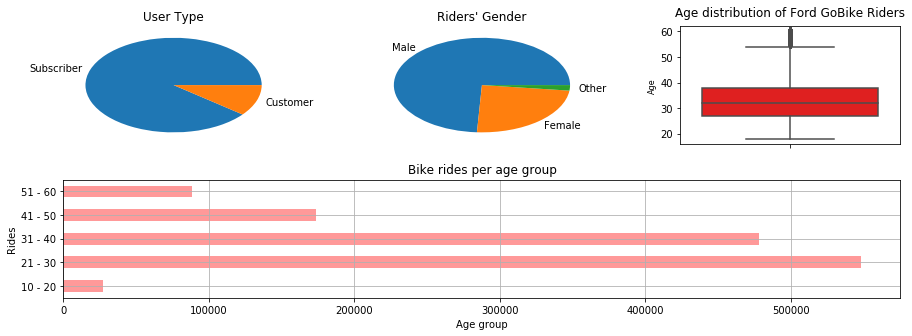

In [9]:
plot1()

###### Conclusion 1: Hence, 974946(74.1%) of our riders are Male, 316283(24%) are Female and 24638(1.9%) are Others. Most of our riders are under the age group 21-40. Mean age of riders is 33.58
###### Further, there are 1175274 Subscribers (89.3%) and just 140593 (10.7%) Customers.

## Visualization 2

###### Question : What is the distribution of trip duration? Which one of the two User Types have longer rides? How does ride duration varies for various Genders?

In [10]:
def plot2():
    grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
    plt.figure(figsize=(15,12))
    plt.subplot(grid[0, 0:])
    binedges = np.arange(0, ford['duration_min'].max() + 1 , 1)
    plt.hist(data = ford , x = 'duration_min' , bins = binedges, color = 'grey')
    plt.xlim(ford['duration_min'].min(),25)
    plt.title('Distribution of various Trip Duration(s)')
    plt.xlabel('Duration in Minutes')
    plt.subplot(grid[1, 0])
    sns.barplot(x = ford['member_gender'], y = ford['duration_min'], color = 'grey')
    plt.title("Ride Duration for various Gender", fontsize = 15)
    plt.xlabel('Gender')
    plt.ylabel('Duration (in minutes)');
    plt.subplot(grid[1, 1])
    sns.barplot(x = ford['user_type'], y = ford['duration_min'], color = 'grey' )
    plt.title('Ride Duration for various User Types', fontsize = 15)
    plt.ylabel('Duration (in minutes)')
    plt.xlabel('User Type');

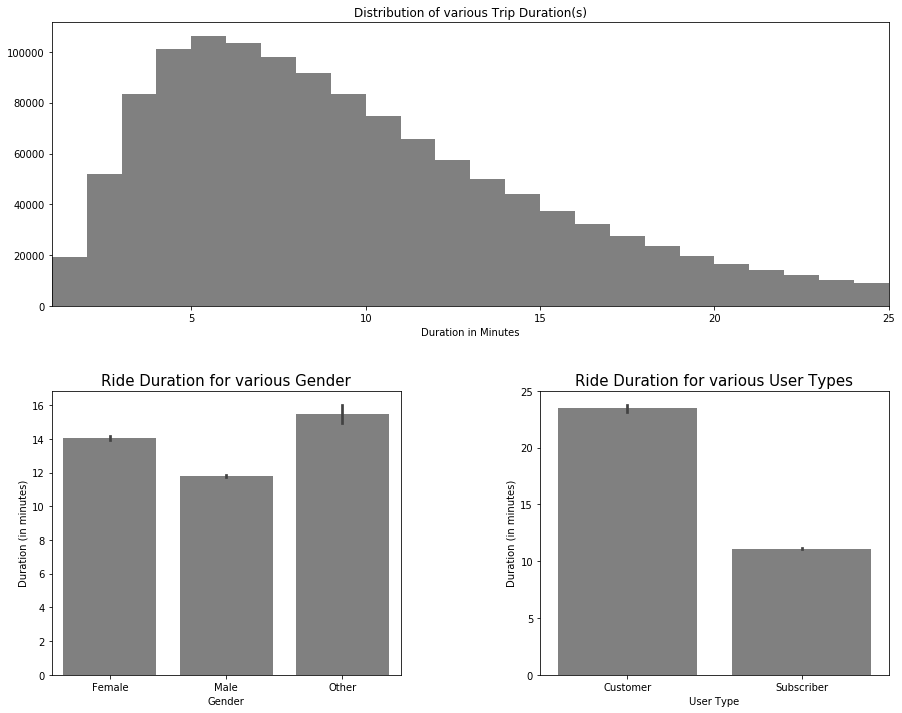

In [11]:
plot2()

###### Conclusion 2 : As we can easily interpret, a majority of folks have a tendency towards using the bikes for a short-time durational trips (around 10 mins). Though there more Subscriber than Customers, Customers tend to shorter duration on rides. Similarly, though 74% of riders are Male, they tend to much shorter duration of rides. 

## Visualization 3
###### Question : Does monthly and weekly distribution of Rides show anything?

In [12]:
def plot3():
    plt.figure(figsize=(15,12))
    plt.subplot(2,2,1)
    x = sns.countplot(pd.DatetimeIndex(ford['start_time']).month, hue= ford['member_gender'])
    months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July']
    x.set_xticklabels(months, rotation = 0, size = 10)
    plt.title('Monthly Distribution of Rides for various Gender', fontsize = 10)
    plt.xlabel('Start Time');
    plt.subplot(2,2,2)
    x = sns.countplot(pd.DatetimeIndex(ford['start_time']).month, hue= ford['user_type'])
    x.set_xticklabels(months, rotation = 0, size = 10)
    plt.title('Monthly Distribution of Rides for various User Types', fontsize = 10)
    plt.xlabel('Start Time');
    plt.subplot(2,2,3)
    x = sns.countplot(pd.DatetimeIndex(ford['start_time']).weekday, palette = "viridis", alpha = 0.8, hue = ford['user_type'])
    day = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    x.set_xticklabels(day, rotation = 0, size = 10)
    plt.title('Weekly Distribution of Rides for various Gender', fontsize = 10)
    plt.xlabel('Start Time');
    plt.subplot(2,2,4)
    x = sns.countplot(pd.DatetimeIndex(ford['start_time']).weekday, palette = "viridis", alpha = 0.8, hue = ford['member_gender'])
    x.set_xticklabels(day, rotation = 0, size = 10)
    plt.title('Weekly Distribution of Rides for various User Types', fontsize = 10)
    plt.xlabel('Start Time');

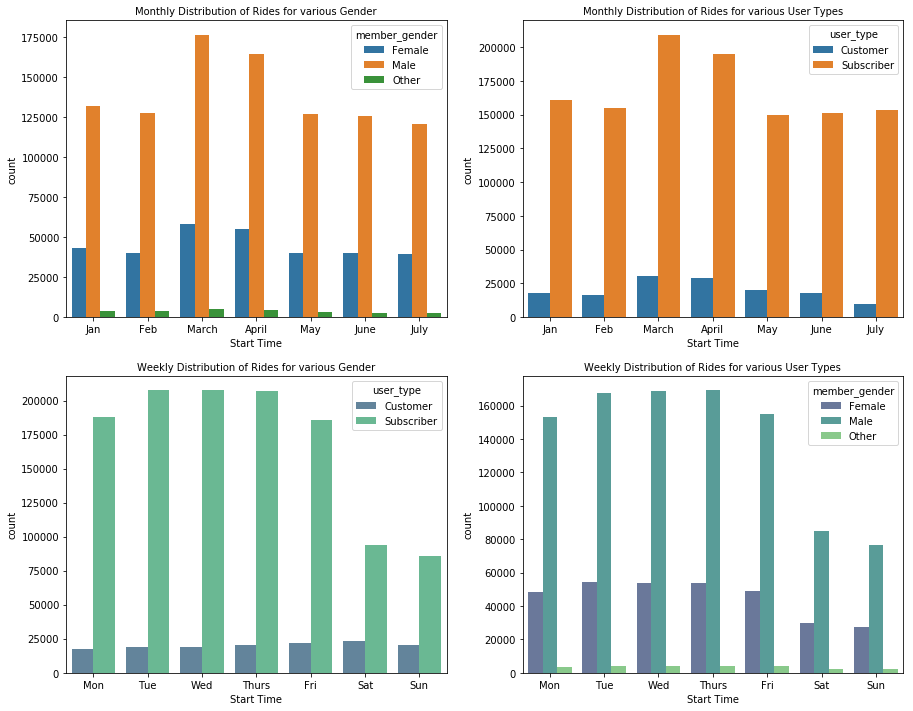

In [13]:
plot3()

###### Conclusion 3:- The number of rides reach its peak in March and April. During weekend, number of rides go down significantly. There are large number of Subscribers than Customers.